## Семинар 14
# Тема: Методы уменьшения размерности

Уменьшение размерности в машинном обучении - это уменьшение числа признаков в наборе данных. Это задача обучения без учителя.

Причины необходимости уменьшения количества признаков:

1. Улучшение обобщающей способности модели из-за удаления избыточных (зависящих от остальных признаков) и неважных (не связаных с зависимой переменной) признаков
2. Сокращение времени обучения
3. Простые модели легче интерпретировать

Задача-минимум – сократить признаковое пространство без потери качества. 
Задача-максимум – сократить признаковое пространство и при этом улучшить качество модели на тестовом наборе.

Не существует одного оптимального метода отбора признаков.

## Подходы к уменьшеню размерности 
Делятся на два основных:

**Отбор признаков** (feature selection)

**Выделение признаков** (feature extraction)

## Отбор признаков
Отбор признаков – это выбор подмножества признаков из имеющихся. 

Существует три типа методов отбора признаков:

1. методы-фильтры (filter methods)
2. методы-обертки (wrapper methods)
3. встроенные методы (embedded methods)

Их можно комбинировать.

**Методы-фильтры** основываются только на статистиках признаков и не используют методы машинного обучения.
В их основе – следующая процедура: получение оценки каждого признака, затем ранжирование признаков по полученным оценкам и выбор признаков с наиболее высокой оценкой.

Примерами методов-фильтров может быть отбор признаков по:

1. Дисперсии (низкая оценка дисперсии может указывать на почти константный признак)
2. Критерию хи-квадрат или F-критерию (чем выше значение хи-квадрат/ F-критерий и ниже p-значение, тем переменная важнее)
3. Коэффициенту корреляции (есть корреляция с зависимой переменной – хороший признак, есть корреляция с другим признаком – избыточный признак)
4. Метрике (чем выше метрика, тем важнее признак).

И др.

**Методы-обертки** используют методы машинного обучения. В их основе – следующая процедура: находим подмножество признаков, строим модель машинного обучения и оцениваем качество, а потом повторяем с другим количеством признаков.

Примеры методов-оберток:

1. Метод прямого включения  (добавляет по одному признаку за итерацию)
2. Метод обратного исключения (исключает по одному признаку за итерацию)
3. Метод исчерпывающего поиска (перебирает все возможные комбинации признаков)

**Встроенные методы** выполняют отбор признаков в ходе обучения модели машинного обучения. В их основе – следующая процедура: обучаем модель машинного обучения, вычисляем важности признаков и удаляем неважные признаки.

Примерами встроенных методов является отбор признаков с помощью регуляризации LASSO, отбор признаков на основе
важностей на основе уменьшения неоднородности для случайного леса.

Отбор признаков – это тоже модель, либо использующая вычисление статистик признаков (в случае с методами-фильтрами), либо использующая параметры моделей машинного обучения (в случае с методами-обертками и встро-
енными методами).

## Выделение признаков

Выделение признаков – это составление меньшего количества новых признаков из исходных, максимально полно описывающих пространство исходного набора данных.

**Метод главных компонент** (англ. Principal Components Analysis, PCA) — один из основных способов уменьшить 
размерность данных, потеряв наименьшее количество информации. Изобретен К.Пирсоном в 1901 г. 
Вычисление главных компонент осуществляется так:
1. Вычисляется матрица ковариации признаков.
2. Отыскиваются собственные вектора и собственные числа матрицы ковариации.
3. Упорядочиваются собственные числа по убыванию. Чем больше число - тем больше дисперсия.
4. Берутся N первых собственных векторов, которые соответствуют первым N собственным числам. 
Они и будут искомыми главными компонентами.

Прежде чем понижать размерность, необходимо масштабировать исходный набор данных.

Импортируем необходимые библиотеки

In [185]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_iris

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

## Отбор признаков (методы-фильтры)

### 1. Загрузите прилагающийся датасет diabetes.csv. Выведите первые пять строк. Отделите целевую переменную Outcome и обозначьте её за y, а оставшиеся данные за X. Выведите их размеры.

In [186]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [187]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)
X.shape, y.shape

((768, 8), (768,))

### 2. Сделайте 10-блочную перекрёстную проверку модели логистической регрессии LogisticRegression(max_iter = 1200), используя библиотечную функцию cross_val_score и выведите средние значение метрики f1-score.

In [188]:
model = LogisticRegression(max_iter=1000)
f1_score = cross_val_score(model, X, y, cv=10, scoring='f1').mean()
f1_score

np.float64(0.6377596026885664)

### 3. Осуществите отбор признаков, используя класс VarianceThreshold(threshold=0.5). Сделайте 10-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики f1-score. Сравните полученное значение метрики со значением, полученным без отбора признаков и сделайте вывод о том эффективно ли был проведён отбор признаков.

In [189]:
selector = VarianceThreshold(threshold=0.5)
selector.fit(X)

VarianceThreshold(threshold=0.5)

In [190]:
selector.variances_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

In [191]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True])

In [192]:
for i, j in zip(X.columns, selector.get_support()):
    print(i,j)

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction False
Age True


In [193]:
X_select = selector.transform(X)
pd.DataFrame(X_select, columns = X.columns[selector.get_support()]).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0


In [194]:
cross_val_score(model, X_select, y, cv=10, scoring='f1').mean()

np.float64(0.6303290985487632)

### 4. Осуществите отбор признаков, используя класс SelectKBest(score_func=chi2, k=7). Сделайте 10-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики f1-score. Сравните полученное значение метрики со значением, полученным без отбора признаков и сделайте вывод о том эффективно ли был проведён отбор признаков.

In [195]:
selector_chi2 = SelectKBest(score_func=chi2, k=7)
selector_chi2.fit(X, y)

SelectKBest(k=7, score_func=<function chi2 at 0x000001E0F6A1A5C0>)

In [196]:
selector_chi2.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [197]:
pd.Series(selector_chi2.scores_, X.columns).sort_values(ascending=False)

Insulin                     2175.565273
Glucose                     1411.887041
Age                          181.303689
BMI                          127.669343
Pregnancies                  111.519691
SkinThickness                 53.108040
BloodPressure                 17.605373
DiabetesPedigreeFunction       5.392682
dtype: float64

In [198]:
selector_chi2.get_feature_names_out()

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'Age'], dtype=object)

In [199]:
X_select_chi2 = selector_chi2.transform(X)
pd.DataFrame(X_select_chi2, columns = selector_chi2.get_feature_names_out()).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0


In [200]:
cross_val_score(model, X_select_chi2, y, cv=10, scoring='f1').mean()

np.float64(0.6303290985487632)

### 5. Повторите тот же самый отбор и обучение модели с 10-блочной перекрёстной проверкой, что и в пункте 4, но используйте теперь Pipeline. Убедитесь, что значение метрики f1 будет то же.

In [201]:
pipeline = Pipeline([
    ("selector", SelectKBest(score_func=chi2, k=7)),
    ("classifier", LogisticRegression(max_iter=1000)) 
])

cross_val_score(pipeline, X, y, cv=10, scoring='f1').mean()

np.float64(0.6303290985487632)

### 6. Осуществите отбор признаков по метрике roc_auc. Отбросьте признаки со значением этой метрики меньшей, либо равной 0.55. Сделайте 10-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики f1-score. Сравните полученное значение метрики со значением, полученным без отбора признаков и сделайте вывод о том эффективно ли был проведён отбор признаков.

In [202]:
metric_list = []
for i in X.columns:
    metric = cross_val_score(model, X[[i]], y, cv=10, scoring="roc_auc").mean()
    metric_list.append(metric)

metric_list


[np.float64(0.6224501424501424),
 np.float64(0.7888019943019944),
 np.float64(0.5873817663817663),
 np.float64(0.5532207977207977),
 np.float64(0.5383760683760684),
 np.float64(0.6901880341880341),
 np.float64(0.6056709401709401),
 np.float64(0.6873746438746438)]

In [203]:
metrcic_values = pd.Series(metric_list, X.columns).sort_values(ascending=False)

In [204]:
col_select = metrcic_values.index[metrcic_values > 0.55]
col_select.tolist()

['Glucose',
 'BMI',
 'Age',
 'Pregnancies',
 'DiabetesPedigreeFunction',
 'BloodPressure',
 'SkinThickness']

In [205]:
X_select_metric =X[col_select]
X_select_metric.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,BloodPressure,SkinThickness
0,148,33.6,50,6,0.627,72,35
1,85,26.6,31,1,0.351,66,29
2,183,23.3,32,8,0.672,64,0
3,89,28.1,21,1,0.167,66,23
4,137,43.1,33,0,2.288,40,35


In [206]:
cross_val_score(model, X_select_metric, y, cv=10, scoring="f1").mean()

np.float64(0.6290289560743691)

### 7. Осуществите отбор признаков, используя матрицу корреляции. Отбросьте признаки с корреляцией большей 0.5.  Сделайте 7-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики f1-score. Сравните полученное значение метрики со значением, полученным без отбора признаков и сделайте вывод о том эффективно ли был проведён отбор признаков.

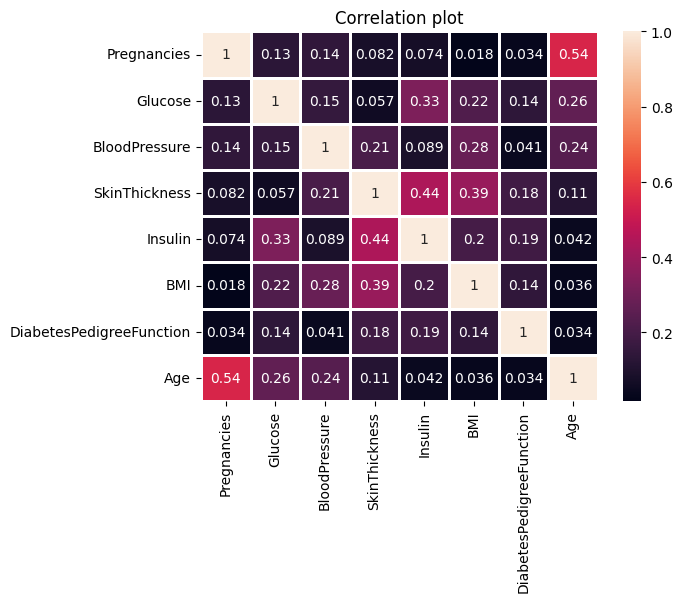

In [207]:
corr = X.corr().abs()
plt.title('Correlation plot')
sns.heatmap(corr, annot=True, fmt='.2g',linewidths=2)
plt.show()

In [208]:
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

In [209]:
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool_))
upper

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341
Glucose,NaN,NaN,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,NaN,NaN,NaN,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,NaN,NaN,NaN,NaN,0.436783,0.392573,0.183928,0.113970
Insulin,NaN,NaN,NaN,NaN,NaN,0.197859,0.185071,0.042163
BMI,NaN,NaN,NaN,NaN,NaN,NaN,0.140647,0.036242
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033561
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
to_drop = [column for column in upper.columns if any(upper[column]>0.5)]
to_drop

['Age']

In [211]:
X_select_corr = X.drop(to_drop, axis=1)
X_select_corr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288


In [212]:
cross_val_score(model, X_select_corr, y, cv=10, scoring="f1").mean()

np.float64(0.6214597989942018)

###  Метод главных компонент

### 1. Загрузите встроенный датасет load_iris. Выведите информацию о его размерах. Выведите первые 5 строк в виде датафрейма. Обозначьте данные за X, а целевую переменную за y.  

In [213]:
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, y, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2


### 2. Разделите данные на обучающую и тестовую выборки в соотношении 75-25. Зафиксируйте воспроизводимость разбиения random_state = 1234. Выведите размеры полученных выборок.

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
X_train.shape, X_test.shape

((112, 4), (38, 4))

### 3. Произведите стандартную нормализацию данных.

In [215]:
from sklearn.metrics import classification_report
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. Реализуйте модель логистической регрессии и выведите отчёт о классификации на тестовых данных.

In [216]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [217]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0])

In [218]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      0.93      0.93        15
   virginica       0.90      0.90      0.90        10

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



### 5. Понизьте размерность данных с помощью метода главных компонент PCA(n_components=2) до двух.

In [219]:
pca = PCA (n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_test_pca[:5]

array([[ 0.59346817,  0.02457677],
       [ 0.68792306, -0.17166552],
       [ 1.40451985, -0.02817261],
       [-2.46086699, -0.06853921],
       [-0.02048018, -1.02942371]])

In [220]:
X_train_pca[:5]

array([[-2.78916721,  0.31360103],
       [-0.39228556, -1.9589319 ],
       [-2.06162488,  0.57426338],
       [ 1.18819102, -1.49598984],
       [-2.62647303,  1.60022987]])

### 7. Визуализируйте полученные данные на диаграмме рассеяния, подкрасив классы. Сделайте вывод о том все ли классы являются линейно разделимыми.

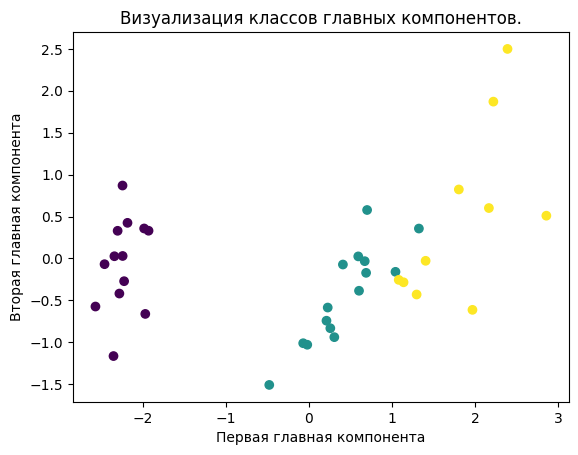

In [221]:
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
plt.title("Визуализация классов главных компонентов.")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.show()

### 8. Обучите заново модель логистической регрессии и оцените ее обучающую способность по отчёту о классификации. Сделайте вывод об эффективности редукции признаков в данном случае.  

In [222]:
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.87      0.93        15
   virginica       0.83      1.00      0.91        10

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



# Задания для самостоятельного выполнения:

## Отбор признаков (методы-фильтры)

1. Загрузите прилагающийся датасет titanic.csv. Обозначьте данные за X, а целевую переменную Survived за y и выведите их размеры.
2. Сделайте 3-блочную перекрёстную проверку модели логистической регрессии и выведите средние значение метрики accuracy.
3. Осуществите отбор признаков, используя класс VarianceThreshold(threshold=0.1). Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. Сравните полученное значение метрики со значением из предыдущего пункта и сделайте вывод о том эффективно ли был проведён отбор признаков.
4. Повторите тот же самый отбор и обучение модели с 3-блочной перекрёстной проверкой, что и в пункте 4, но используйте теперь Pipeline. Убедитесь, что значение метрики будет то же.
5. Осуществите отбор признаков, используя класс SelectKBest(score_func=chi2, k=9). Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. Сравните полученное значение метрики со значением из пункта 2 и сделайте вывод о том эффективно ли был проведён отбор признаков.
6. Осуществите отбор признаков по метрике roc_auc. Отбросьте признаки со значением этой метрики меньшей, либо равной 0.49. Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. 
7. Осуществите отбор признаков, используя матрицу корреляции. Отбросьте признаки с корреляцией большей 0.5.  Сделайте 3-блочную перекрёстную проверку модели логистической регрессии на отобранных признаках и выведите средние значение метрики accuracy. Сравните полученное значение метрики со значением из пункта 3 и сделайте вывод о том эффективно ли был проведён отбор признаков.

## Метод главных компонент

1. Загрузите прилагающийся датасет heart.csv.
2. Обозначьте данные за X, а целевую переменную output за y и выведите их размеры.
3. Разделите данные на обучающую и тестовую выборки в соотношении 85-15. Зафиксируйте воспроизводимость разбиения random_state = 15. Выведите размеры полученных выборок.
4. Произведите стандартную нормализацию данных и реализуйте модель логистической регрессии. Оцените качество с помощью метрики f1 на тестовых данных.
5. Понизьте размерность данных с помощью метода главных компонент сначала до одной компоненты, потом до двух и так далее. Каждый раз обучайте заново модель логистической регресии и находите метрику f1.  
6. Постройте график зависимости значений метрики f1 от размерности данных. Сделайте вывод о том, какую размерность следует выбрать.